In [1]:
import requests

In [2]:
r = requests.get("https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/imd.traineddata", stream = True)

with open("/usr/share/tesseract-ocr/4.00/tessdata/ind.traineddata","wb") as file:
  for block in r.iter_content(chunk_size=1024):
    if block:
      file.write(block)

In [3]:
#installing libraries required for optical character recognition
! apt install tesseract-ocr libtesseract-dev libmagickwand-dev

#Ipython to clear output which is not important
from IPython.display import HTML, clear_output
clear_output()

In [5]:
! pip install pytesseract wand opencv-python
clear_output()

In [6]:
from PIL import Image
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re

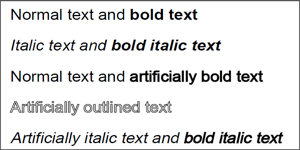

In [8]:
image = Image.open(requests.get('https://i.stack.imgur.com/pbIdS.png', stream=True).raw)
image = image.resize((300,150))
image.save('sample.png')
image

In [9]:
#extracting text from image
custom_config = r'-l eng --oem 3 --psm 6'
text = pytesseract.image_to_string(image, config = custom_config)
print(text)

Normal text and bold text

Italic text and bold italic text

Normal text and artificially bold text
Artificially outlined text

Artificially italic text and bold italic text



In [10]:
#perform opencv operations to get text from complex images
image = cv2.imread('sample.png')

image becomes less complex to process

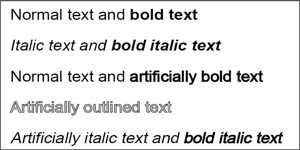

In [11]:
#grayscale image
def get_grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = get_grayscale(image)
Image.fromarray(gray)

Blurr the image to remove noise from the image

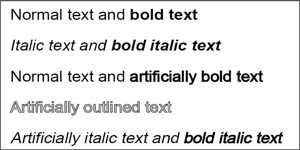

In [12]:
#noise removal
def remove_noise(image):
  return cv2.medianBlur(image,5)
noise = remove_noise(gray)
Image.fromarray(gray)

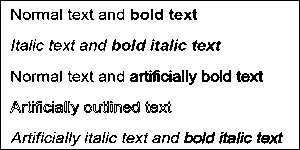

In [13]:
#thresholding
def thresholding(image):
  return cv2.threshold(image, 0,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
thresh = thresholding(gray)
Image.fromarray(thresh)


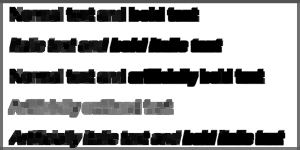

In [14]:
#erosion
def erode(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.erode(image, kernel, iterations = 1)
erode = erode(gray)
Image.fromarray(erode)

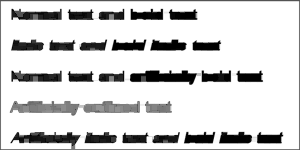

In [15]:
#morphology
def opening(image):
  kernel = np.ones((5,5),np.uint8)
  return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
opening = opening(gray)
Image.fromarray(opening)

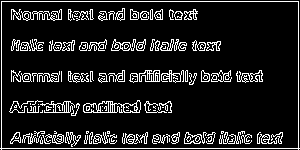

In [20]:
#canny edge detection
def canny(image):
  return cv2.Canny(image,100,200)
canny = canny(gray)
Image.fromarray(canny)

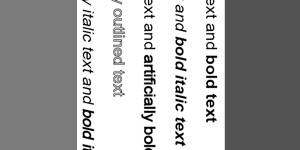

In [21]:
#skew correction
def deskew(image):
  coords = np.column_stack(np.where(image >0))
  angle = cv2.minAreaRect(coords)[-1]
  if angle < -45:
    angle = -(90+angle)
  else:
    angle = -angle
  (h,w) = image.shape[:2]
  center = (w // 2, h // 2)
  M = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated = cv2.warpAffine(image, M, (w,h), flags = cv2.INTER_CUBIC, borderMode = cv2.BORDER_REPLICATE)
  return rotated

rotated = deskew(gray)
Image.fromarray(rotated)
